# Workbook 5
Logistic regression and Panel analysis. The discussion on logistic regression are from A Gentle Introduction to Stata by Alan Acock. The discussion on panel analysis are from Multilevel and Longitudinal Modeling Using Stata by Sophia Rabe-Hesketh and Anders Skrondal. The discussion on panel analysis is also from Fixed Effects Models and Fixed Effects Models Using Categorical Outcomes, both written by Paul Allison.

# Logistic regression
When you have a dependent variable that is categorical, you have to some form of logistic regression. Right now, we will focus on logist (binary dependent variable).

In [8]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5"
use "http://www.stata-press.com/data/agis6/divorce.dta", clear
list divorce positives


C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5



     +--------------------+
     | divorce   positi~s |
     |--------------------|
  1. |       0         10 |
  2. |       0          8 |
  3. |       0          9 |
  4. |       0          7 |
  5. |       0          8 |
     |--------------------|
  6. |       0          5 |
  7. |       0          9 |
  8. |       0          6 |
  9. |       0          8 |
 10. |       0          7 |
     |--------------------|
 11. |       1          1 |
 12. |       1          1 |
 13. |       1          3 |
 14. |       1          1 |
 15. |       1          4 |
     |--------------------|
 16. |       1          5 |
 17. |       1          6 |
 18. |       1          3 |
 19. |       1          2 |
 20. |       1          0 |
     +--------------------+


In [9]:
scatter divorce positives
graph export "div_obs.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph0.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph0.pdf saved as PDF format

file div_obs.png saved as PNG format


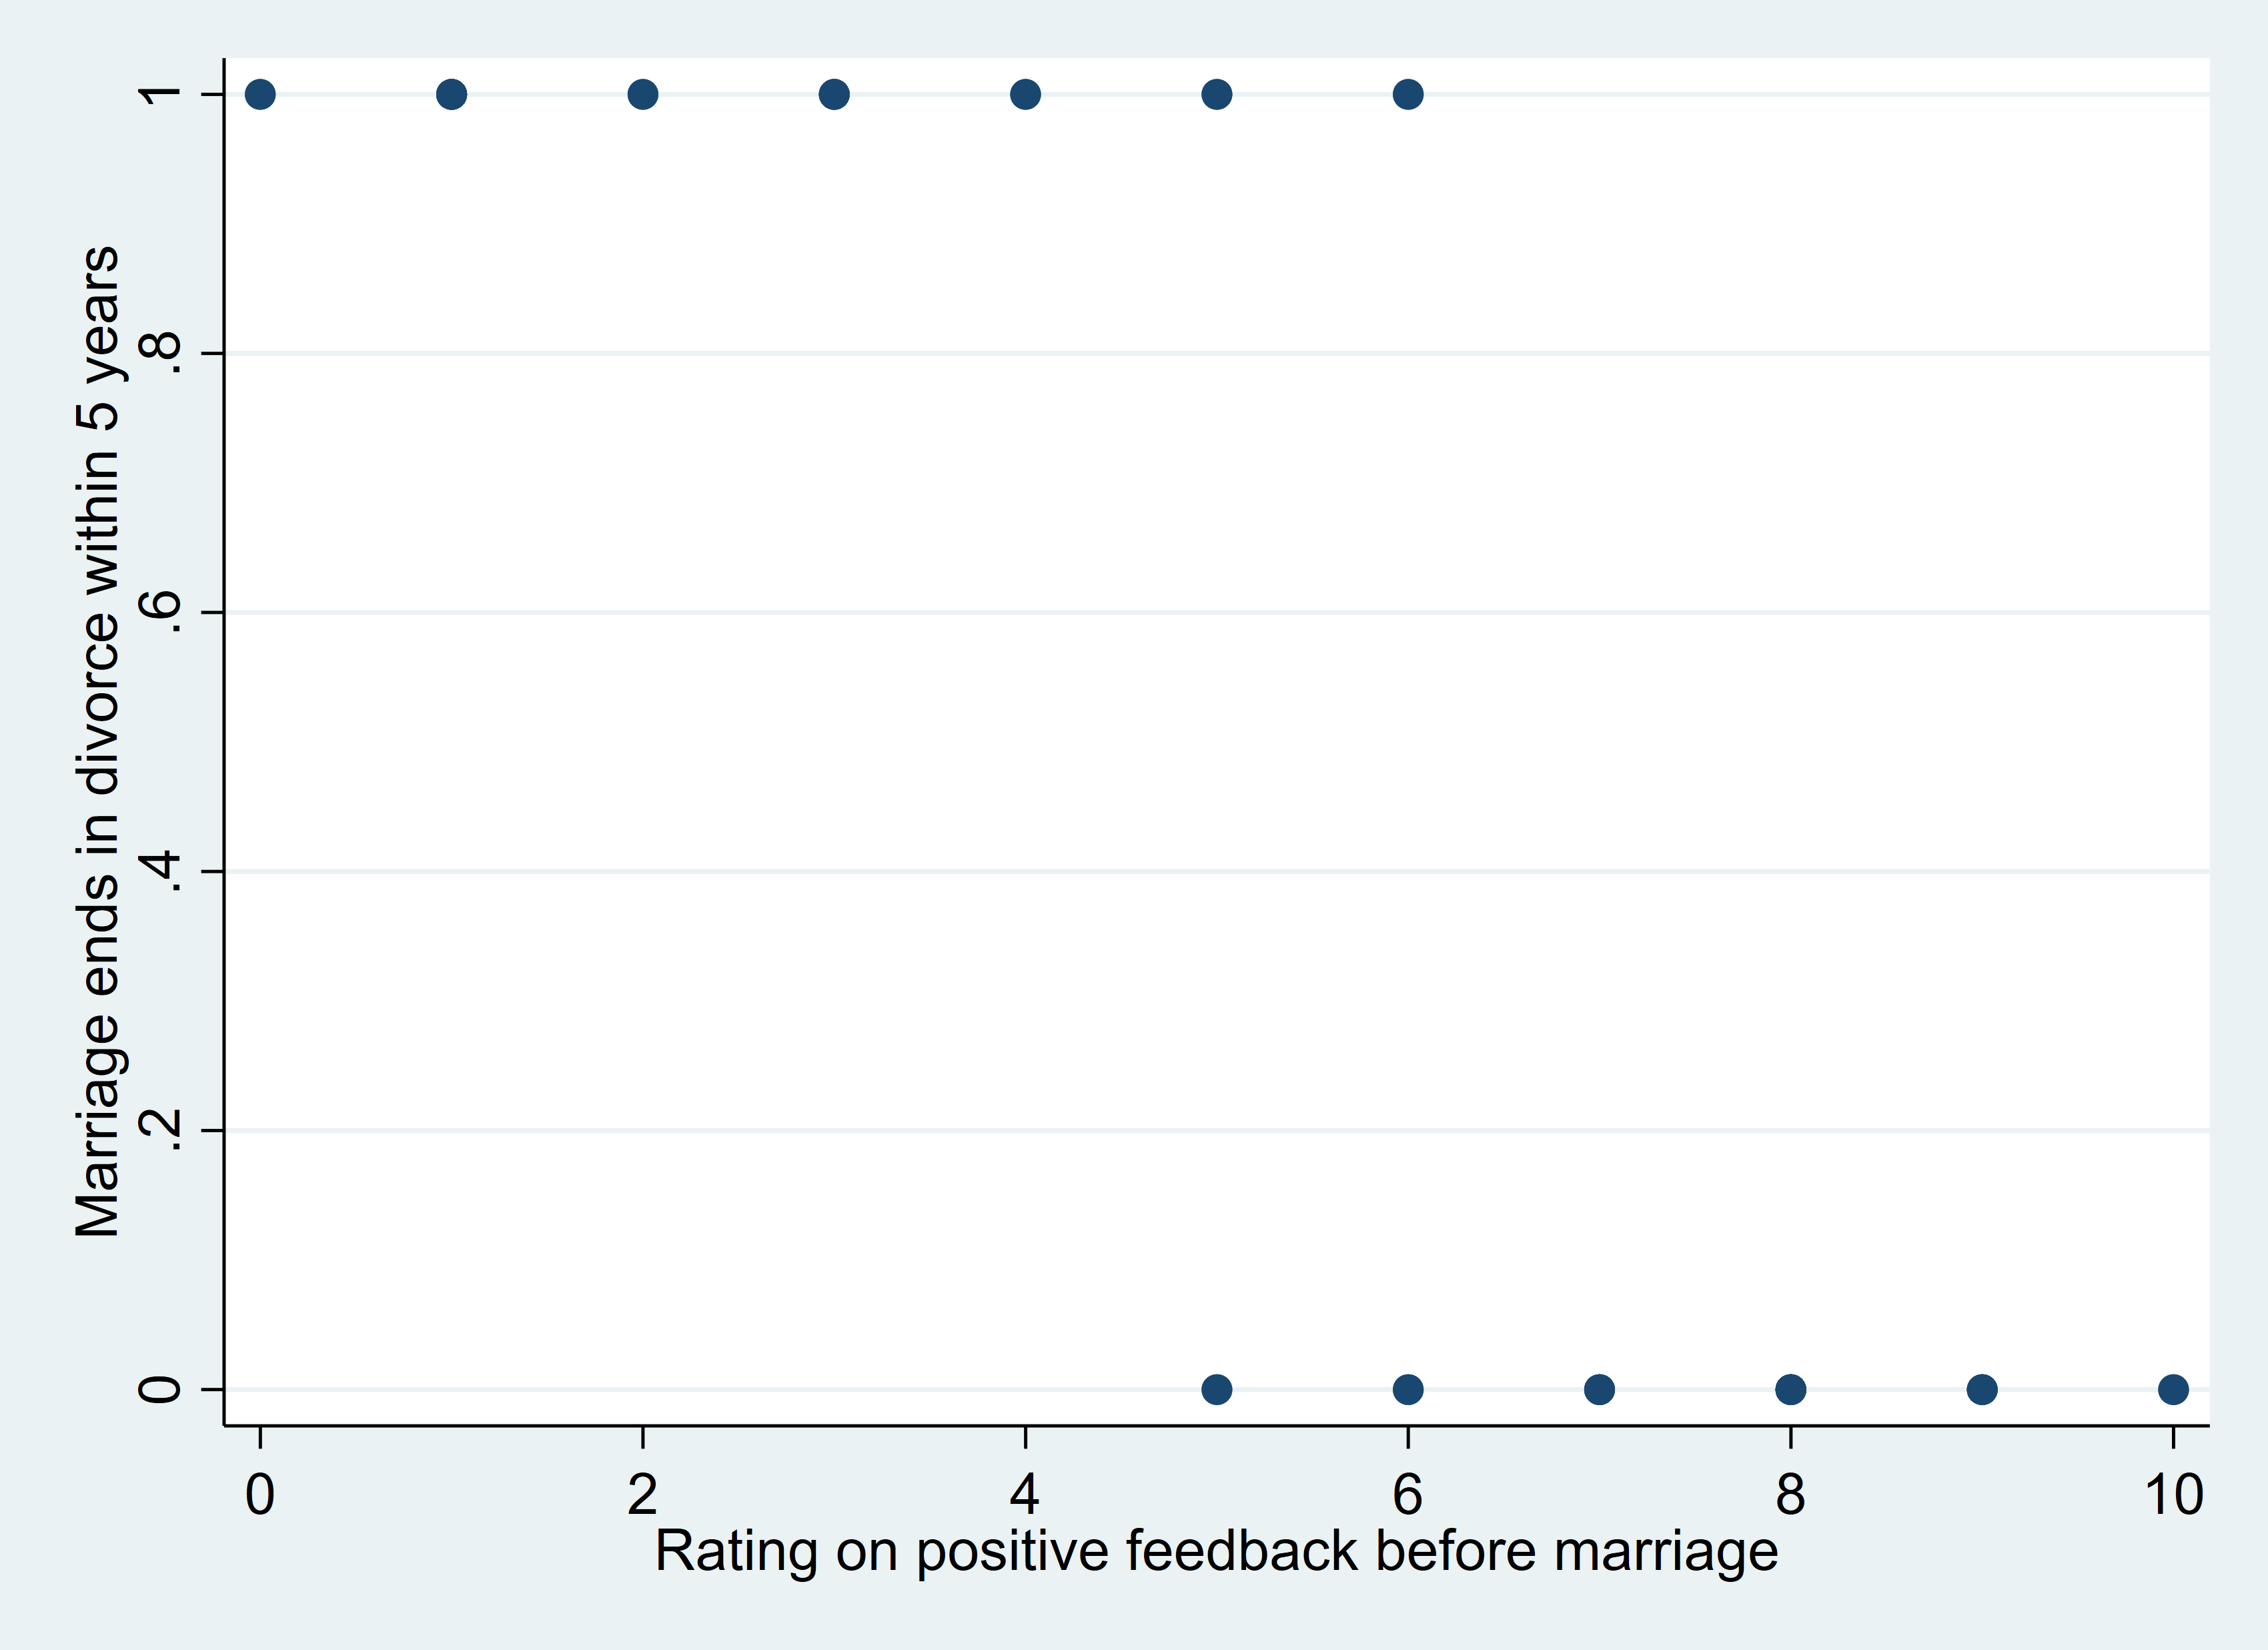

In [10]:
logit divorce positives


Iteration 0:   log likelihood = -13.862944  
Iteration 1:   log likelihood = -3.5768067  
Iteration 2:   log likelihood = -3.4221578  
Iteration 3:   log likelihood = -3.4189568  
Iteration 4:   log likelihood = -3.4189473  
Iteration 5:   log likelihood = -3.4189473  

Logistic regression                                     Number of obs =     20
                                                        LR chi2(1)    =  20.89
                                                        Prob > chi2   = 0.0000
Log likelihood = -3.4189473                             Pseudo R2     = 0.7534

------------------------------------------------------------------------------
     divorce | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
   positives |  -1.816682    1.00464    -1.81   0.071     -3.78574    .1523768
       _cons |   9.921966   5.684654     1.75   0.081    -1.219751    21.06368
----------------

In [11]:
predict pred_prob

(option pr assumed; Pr(divorce))


In [12]:
scatter pred_prob positives
graph export "div_obs_pred_prob.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file div_obs_pred_prob.png not found)
file div_obs_pred_prob.png saved as PNG format


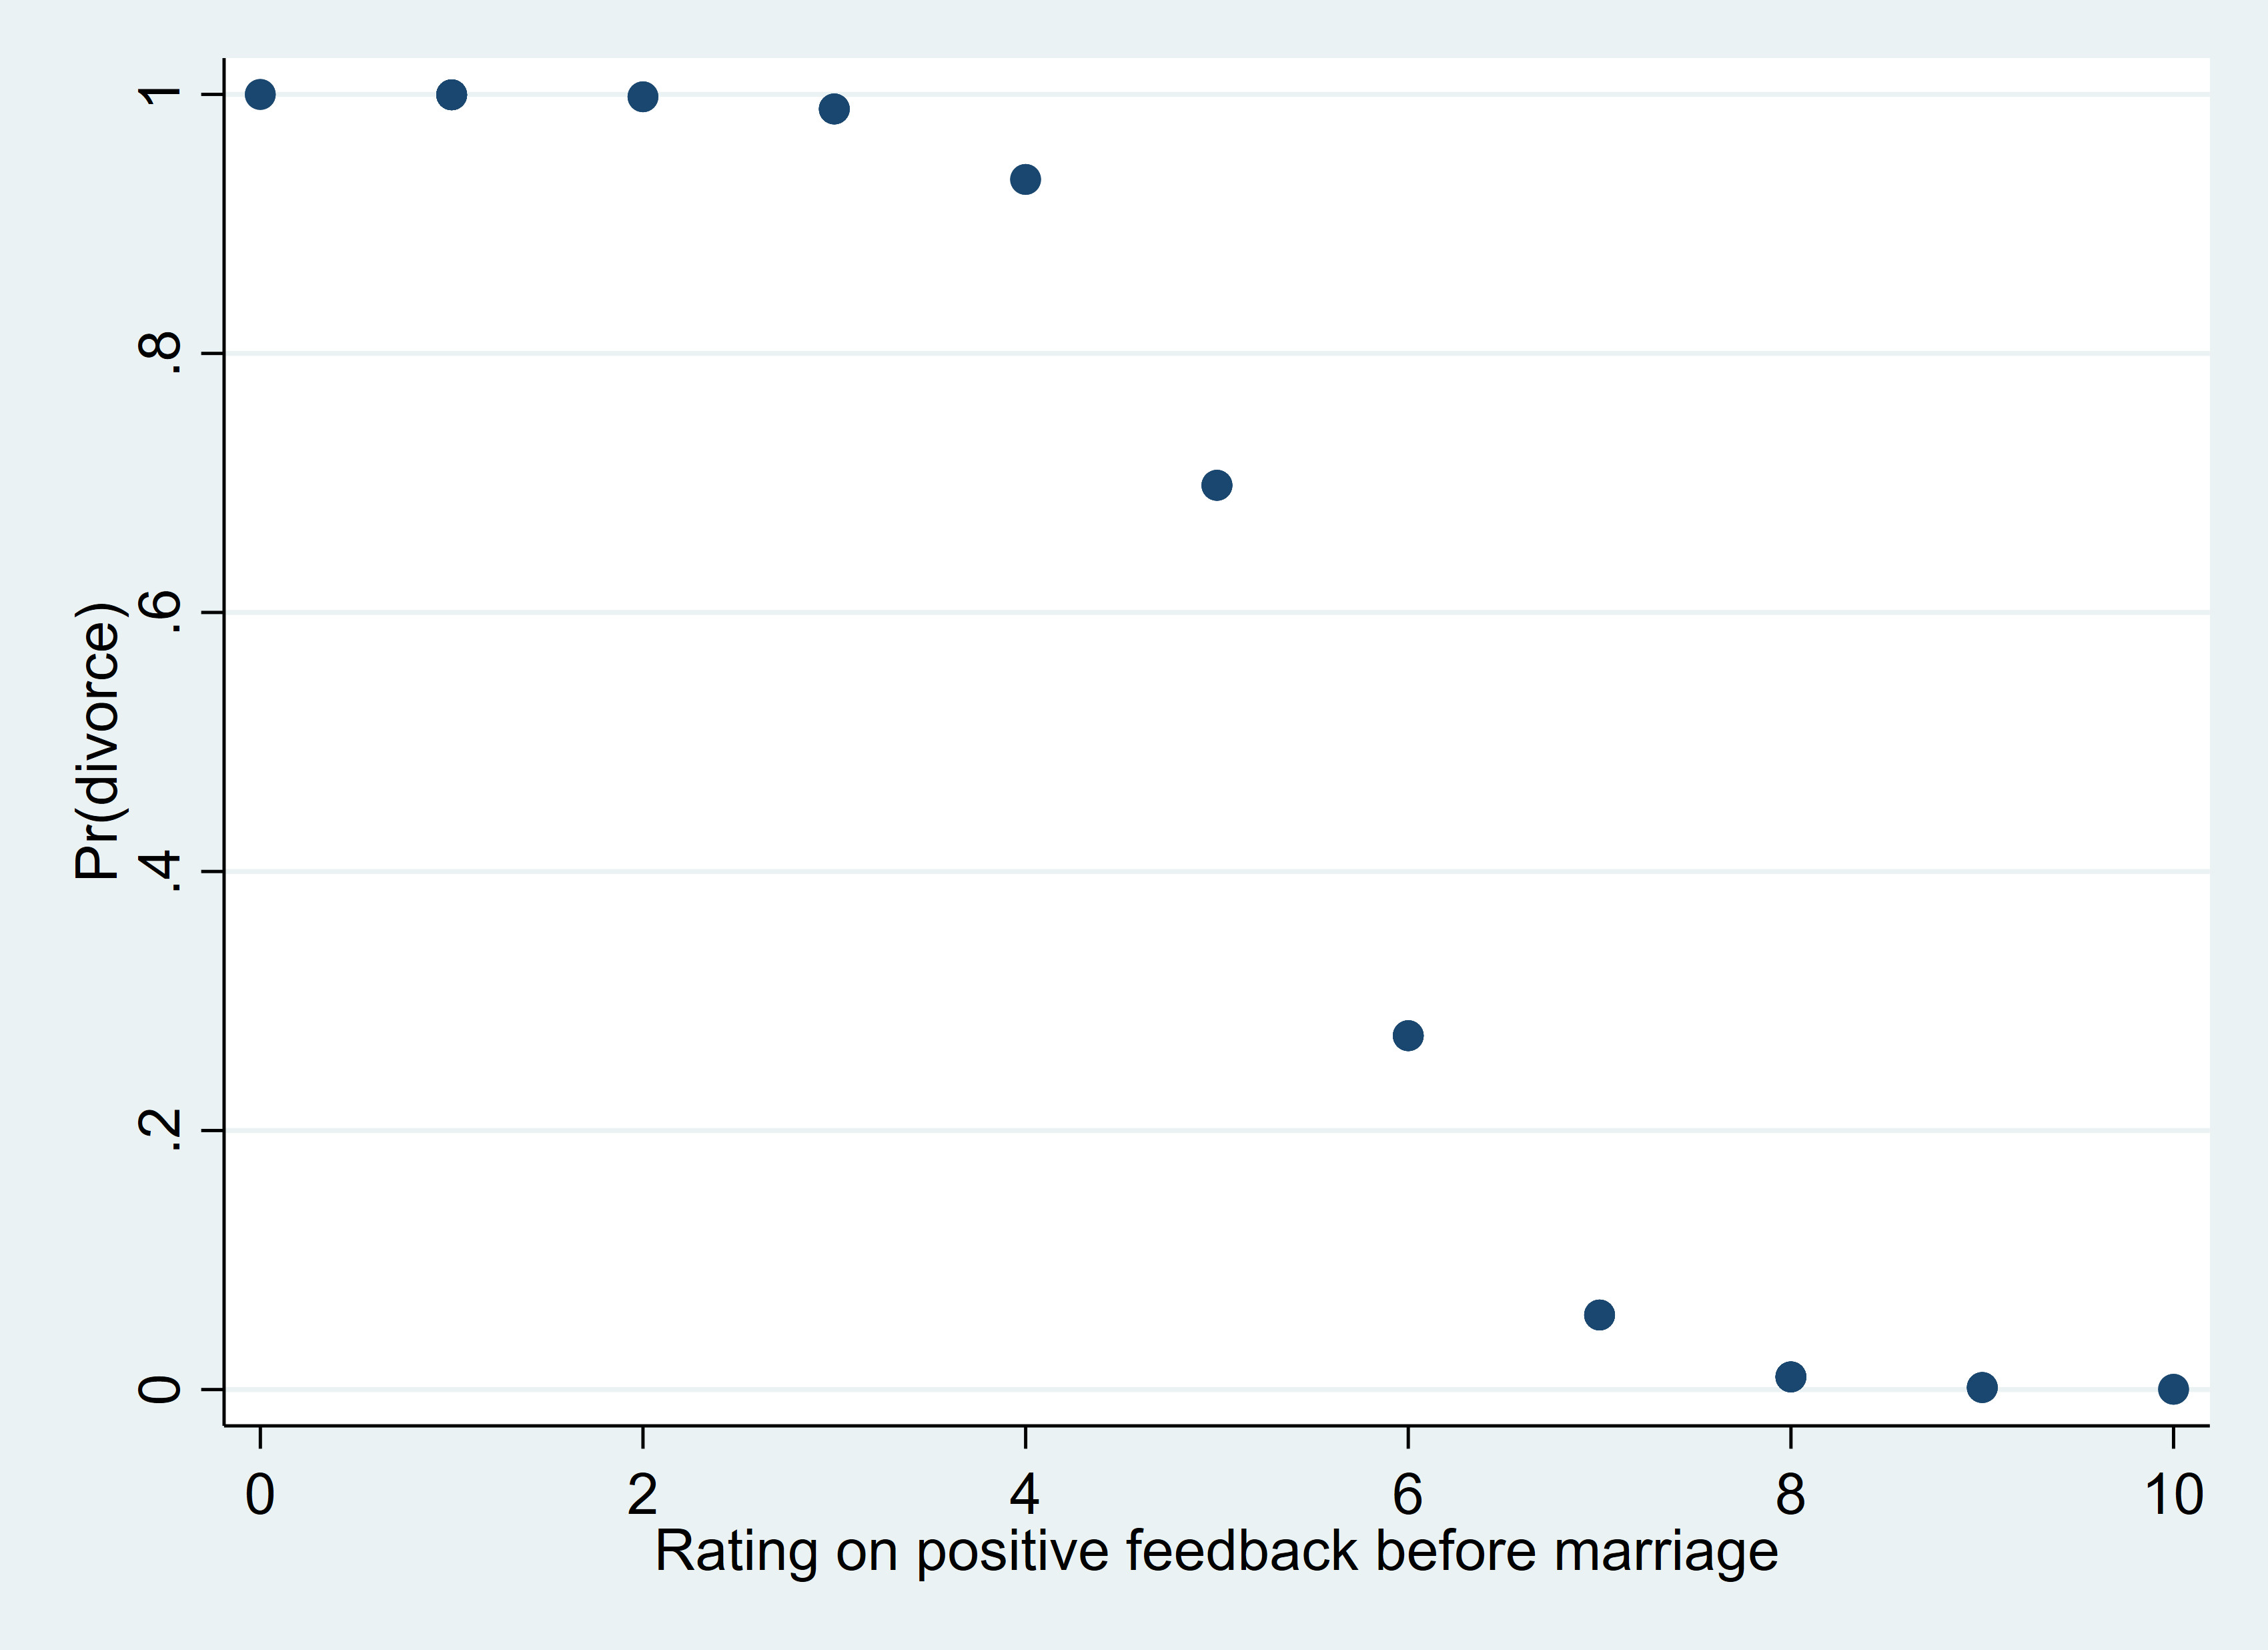

See how the predicted probabilities for logit positive feedback has a S-curve to divorce?

In [13]:
quietly logit divorce positives
logit , coeflegend




Logistic regression                                     Number of obs =     20
                                                        LR chi2(1)    =  20.89
                                                        Prob > chi2   = 0.0000
Log likelihood = -3.4189473                             Pseudo R2     = 0.7534

------------------------------------------------------------------------------
     divorce | Coefficient  Legend
-------------+----------------------------------------------------------------
   positives |  -1.816682  _b[positives]
       _cons |   9.921966  _b[_cons]
------------------------------------------------------------------------------


In [14]:
predict yhat_linear, xb
*this generate below gives us the same output as above
gen logit_predict_linear=_b[positives]*positives+ _b[_cons]

In [15]:
scatter logit_predict_linear positives
graph export "div_obs_logit_linear.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph2.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph2.pdf saved as PDF format

file div_obs_logit_linear.png saved as PNG format


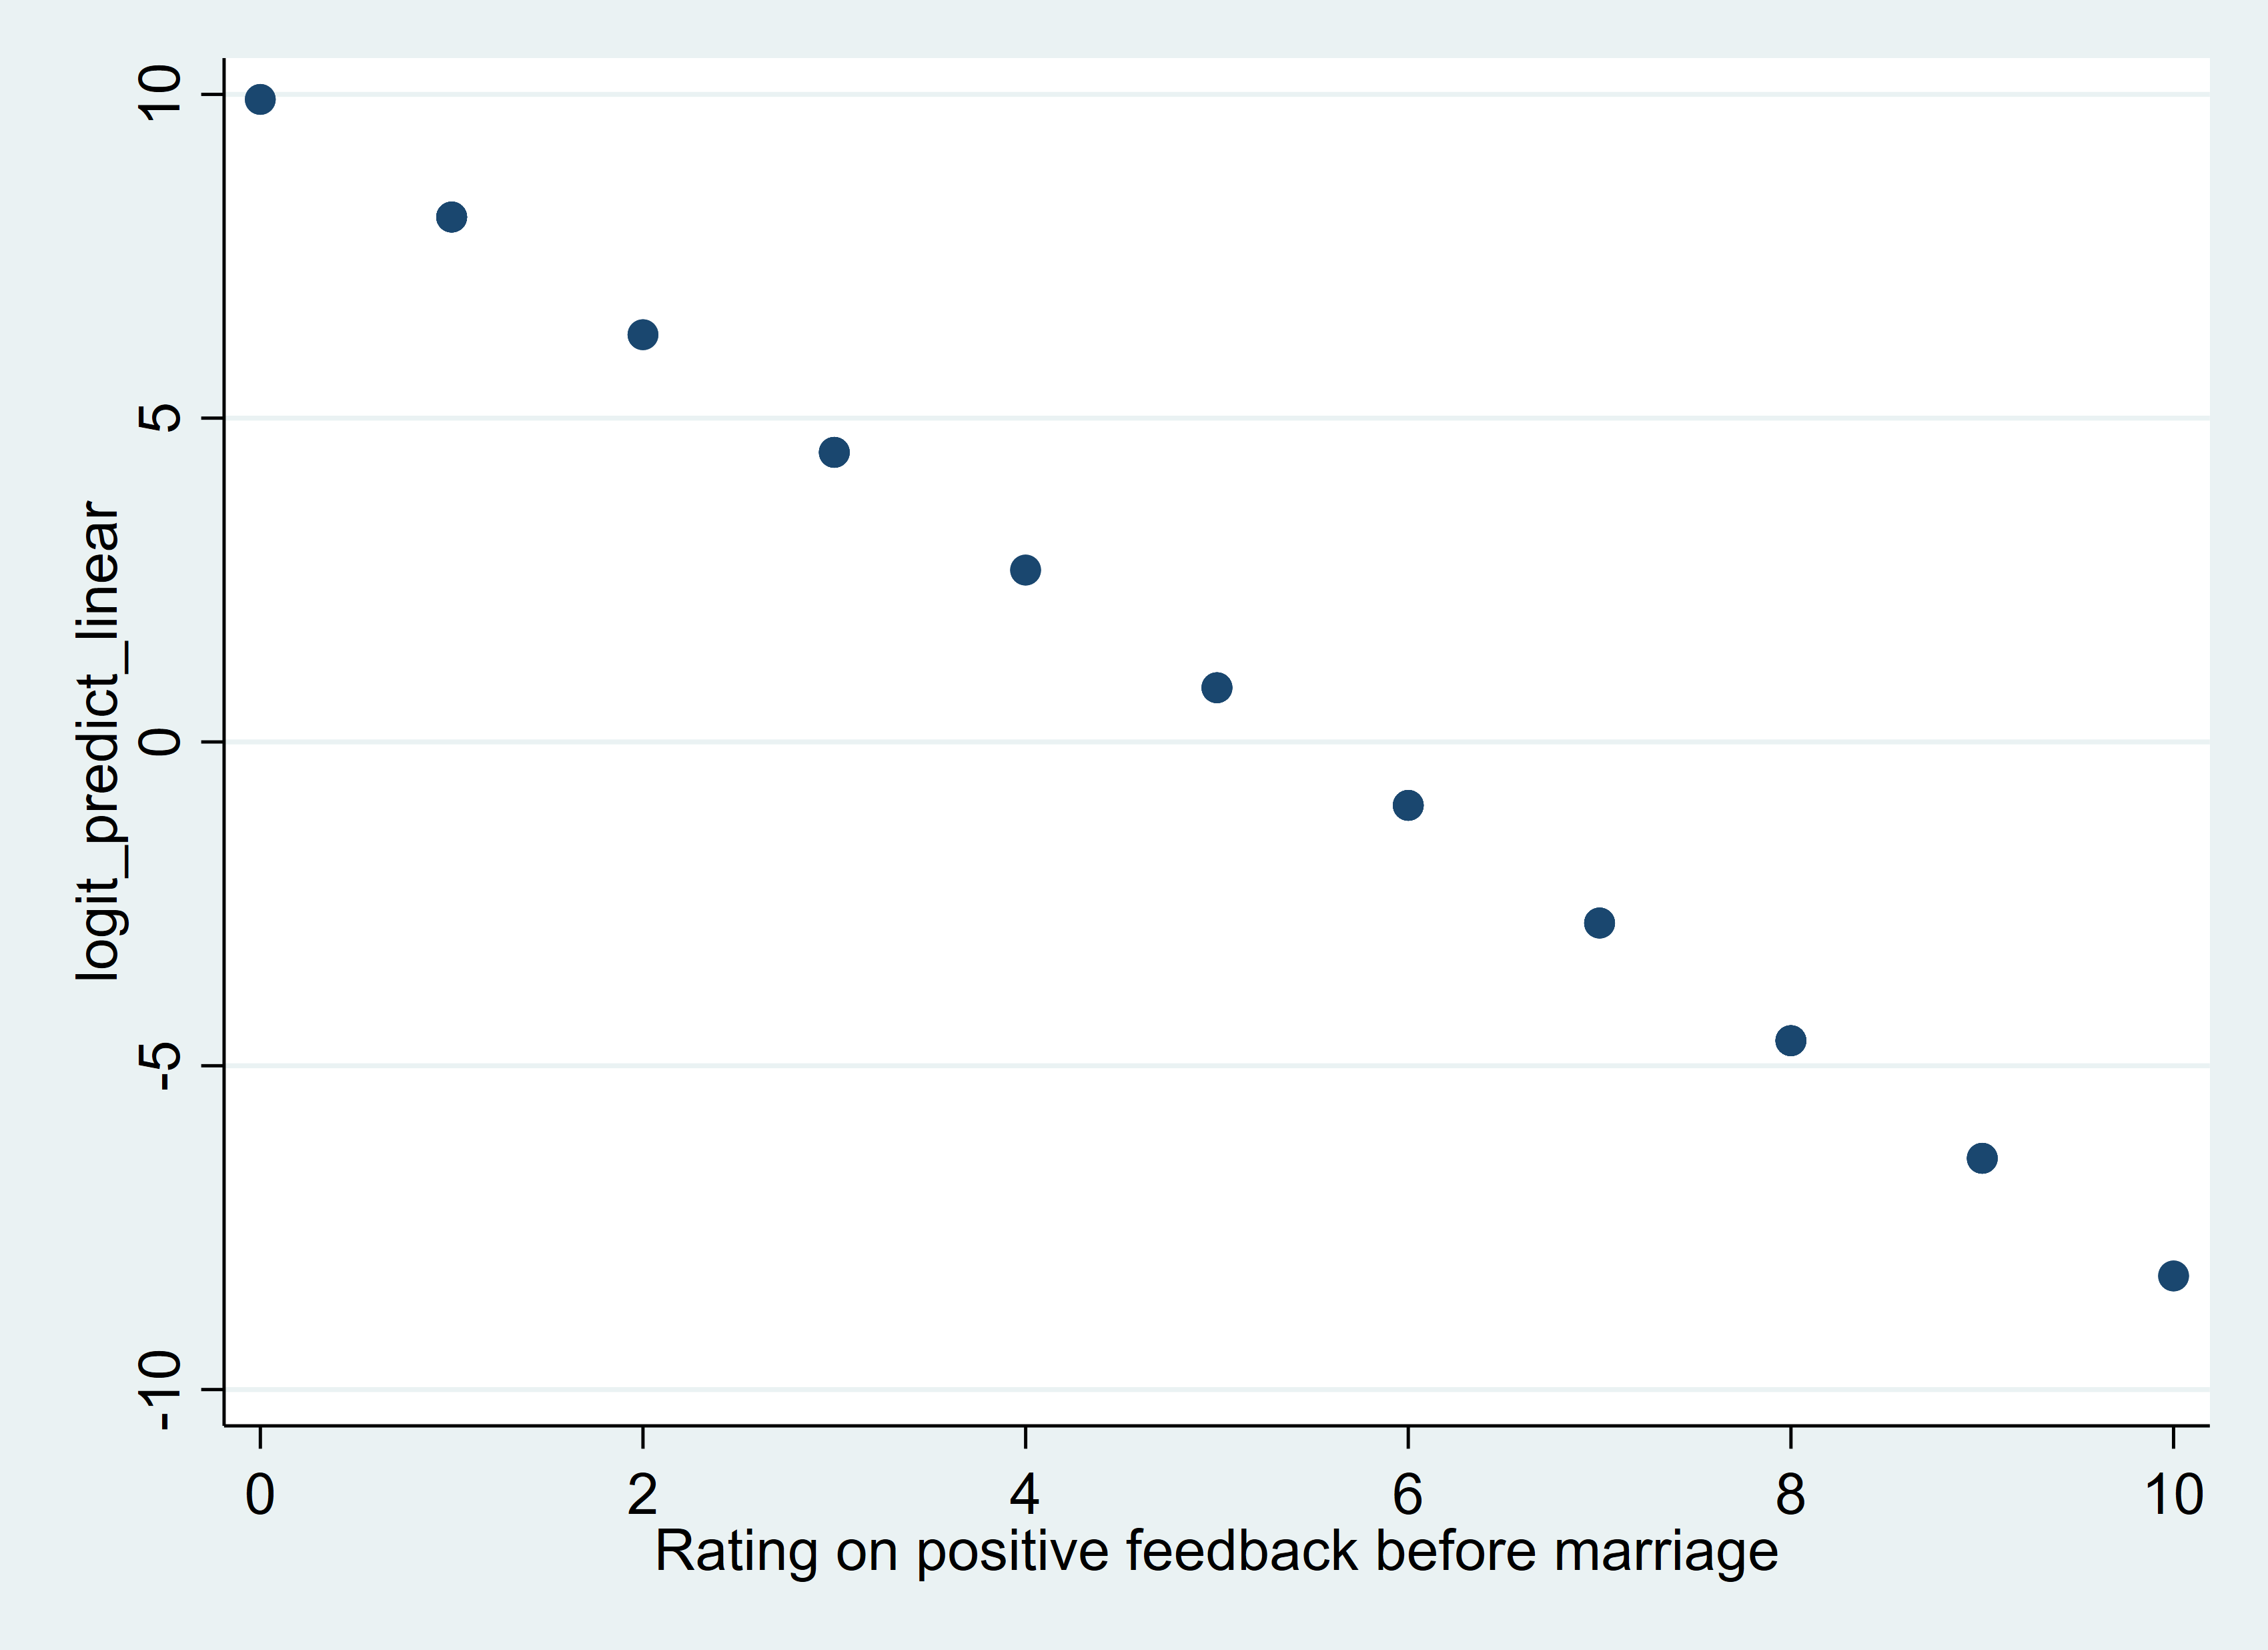

Here, we see the logit regression estimates are linear. This means that the logistic regression here, it is a linear relationship (unless we put quadratic terms in).

The data is not linear, so we use logit and that transforms the data into linear model.

# Categorical variables as dependent variables
We use logistic regression to estimate a regression model with a categorical variable as the dependent variable. Logistic regression estimates the model using the logit. And the logit is the natural log transformation of odds ratio.

In [16]:
use "http://www.stata-press.com/data/agis6/environ", clear
tab environ libcand, row




+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

Environmen |
       tal |    support liberal
concern: 1 |  candidate: 1 yes, 0
   high, 0 |          no
       low |         0          1 |     Total
-----------+----------------------+----------
         0 |         6          4 |        10 
           |     60.00      40.00 |    100.00 
-----------+----------------------+----------
         1 |         3          7 |        10 
           |     30.00      70.00 |    100.00 
-----------+----------------------+----------
     Total |         9         11 |        20 
           |     45.00      55.00 |    100.00 


<b> Probabilities</b>
* The probability of liberal candidate is 11/20 (.55)
* The probaility of a liberal candidate having low env concern is 4/10 (.4)
* The probaility of a liberal candidate having high env concern is 7/10 (.7)
* Probabilities range from 0 to 1.

<b> Odds</b>
* The ODDS of liberal candidate is 11/9 (1.22). Odds(liberal)=Odds(liberal)/Odds(not liberal)=1.22
* The ODDS of liberal candidate and having low env concern is 4/6 (.67). Odds(liberal & low env concern)/Odds(not liberal & low env concern)=4/6.
* The ODDS of both liberal candidate and having high env concern is 7/3 (2.33). Odds(liberal & high env concern)/Odds(not liberal & high env concern)=7/3
* Odds range from 0 to infinity where below 1 means lowers odds and greater than 1 means higher odds.

<b> Odd ratios</b>
* The ODDS RATIO of liberal candidate of having environmental concern is 3.48 (2.33/.67). The odds of a liberal candidate having high env concern is 3.48 times greater than a liberal candidate having low env concern.
* Odds ratio ranges from 0 to infinity for things more likely to happens and between 0 to 1 for things less likely to happen.
* We can natural log odd ratio to make them normally distributed.

Using logit, allows us to estimate a linear regression of the odds ratio:

<center>$logit=ln(odds(p)/odds(q))$
    
<center>$logit=ln(odds ratio)$

Let's look at some of math behind the logit:

Previously, we used the following equation for regression model with contiunous outcomes:

<center>$y=a+bx$
    
Let's plug in logit (the natural log of the odds ratios (OR)):
<center>$logit_y=a+b*logit_x$
    
We can get back to the just the odds ratios by taking the logit to the power e:
<center>$exp^{ln(OR_y)}=exp^{ln(a+b*OR_x)}$
    
This gets us back to odds ratios:
<center>$(OR_y)=(a+b*OR_x)$
    
So, when getting your coefficients estimates, they must be transformed back into odds ratios (by exponentiated).

<b>By using logits, we are basically modeling a similar regression as compared to contiunous outcomes. So, you can have interaction terms in the model. You can even have quadratic or other variable transformations. Just make sure it makes sense in terms of theory and for the data.

### Interaction example with logistic regression

In this example, we are interested in predicting one's likelihood of drinking in the last 30 days. This variable is a categorical 0/1 variable. We will be using the following independent variables: age, having peers drinking, having dinners with family, and gender.

<b>Additive model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i)$

In [17]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5"
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear
codebook drank30 age97 pdrink97 dinner97 male


C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5

(National Survey of Youth, 1997, selected variables from first wave)


--------------------------------------------------------------------------------
drank30                                                              (unlabeled)
--------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/8,984
       Unique mv codes: 3                        Missing .*: 5,165/8,984

            Tabulation: Freq.  Value
                        2,094  0
                        1,725  1
                            3  .a
                           15  .b
                        5,147  .d

--------------------------------------------------------------------------------
age97                                                 age at interview date 1997
-------

In [18]:
summarize drank30 age97 pdrink97 dinner97 male


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     drank30 |      3,819    .4516889    .4977257          0          1
       age97 |      8,984    14.35363    1.488145         12         18
    pdrink97 |      8,799    2.136152    1.246358          1          5
    dinner97 |      5,356     5.07823    2.273635          0          7
        male |      8,984    .5119101     .499886          0          1


In [19]:
*Using "logistic" command reports the estimates in ODDS ratios
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

Here, we see that as age, % of peers drinking increases, the odds of drinking increase. Furthermore, we see that as # of dinner with family increases, the odds of drinking decreases. Men have less odds to drink as compared to women.

In [71]:
*Using "logit" command reports the estimates in logits so you have transform them back!
logit drank30 age97 pdrink97 dinner97 male


Iteration 0:   log likelihood = -1100.0502  
Iteration 1:   log likelihood =  -1061.142  
Iteration 2:   log likelihood = -1061.0474  
Iteration 3:   log likelihood = -1061.0474  

Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   .1563548   .0585158     2.67   0.008     .0416659    .2710437
    pdrink97 |   .2846336   .0450001     6.33   0.000     .1964351    .3728321
    dinner97 |  -.0596587    .022151    -2.69   0.007    -.1030739   -.0162434
        male |   -.020721  

This reports the logit. They are transformation of each other. 

<center>$exp_{logit}=(odds ratio)$

In [72]:
logit , coeflegend


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Legend
-------------+----------------------------------------------------------------
       age97 |   .1563548  _b[age97]
    pdrink97 |   .2846336  _b[pdrink97]
    dinner97 |  -.0596587  _b[dinner97]
        male |   -.020721  _b[male]
       _cons |  -2.947557  _b[_cons]
------------------------------------------------------------------------------


In [73]:
di exp(_b[age97])

1.169241


## Generally, negative logit indicate below 1 odds ratios and positive indicate greater than 1 odds ratio.

Another thing to note: logistic regression uses maximum likelihood estimation. This is not OLS. This method calculates many iterations of the distributions to figure out its positioning and uses the one with maximum likelihood. 

In [74]:
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

The odd ratios of drinking are multiplied by 1.17 for every one year increase to age. For odds ratio that are greater than 1, you can substract the value by one and interpret it as a percent. For example For every one year increase in age, there is a 17% increase in odds of drinking. 

The odd ratios of drinking for men are .97 as compared to women. For odds ratio less than 1, you can substract the value by one and interpret the value as a percent. For example the odds of drinking for men is 2% less as compared to women.

Let's say you wanted to compare the odds ratio across various variables. It is recommended you use standardized values because the variables are measured differently. There is a, external program in Stata called spost.

In [ ]:
*search for the external program
search spost13
*Click spost13_ado
*and install the package

In [20]:
*One command you can use after the logist command is listcoef (part of the spost13)
*It estimates change in coefficients for every one standard deviation increase for each own's variable
listcoef, help percent


logit (N=1654): Percentage change in odds 

  Odds of: 1 vs 0

------------------------------------------------------------------------
             |         b        z    P>|z|         %     %StdX     SDofX
-------------+----------------------------------------------------------
       age97 |    0.1564    2.672    0.008      16.9      15.8     0.937
    pdrink97 |    0.2846    6.325    0.000      32.9      41.3     1.215
    dinner97 |   -0.0597   -2.693    0.007      -5.8     -13.1     2.349
        male |   -0.0207   -0.194    0.846      -2.1      -1.0     0.499
    constant |   -2.9476   -3.718    0.000         .         .         .
------------------------------------------------------------------------
       b = raw coefficient
       z = z-score for test of b=0
   P>|z| = p-value for z-test
       % = percent change in odds for unit increase in X
   %StdX = percent change in odds for SD increase in X
   SDofX = standard deviation of X


In [73]:
*clearly out the previous data to make a bargraph based on the table
clear
*this command lets you input data into Stata 
input age
15.8




           age


In [83]:
input peers
41.3
end



         peers

command end is unrecognized


r(199);
r(199);


In [77]:
input dinner
-13.1
end



        dinner

command end is unrecognized


r(199);
r(199);


In [78]:
input male
-1.0
end



          male

command end is unrecognized


r(199);
r(199);


In [84]:
list in 1


     +-----------------------------------------------+
     |  age   pdrink   dinner   male   drink   peers |
     |-----------------------------------------------|
  1. | 15.8     41.3    -13.1     -1    41.3    41.3 |
     +-----------------------------------------------+


In [85]:
graph bar (asis) age male peers dinner, bargap(10) ///
    blabel(name, position(outside)) ytitle(Percentage Change in Odds) ///
    title(Percentage Change in Odds of Drinking by) ///
    subtitle("Age, Gender, Percent of Peers Drinking, Meas with Family") ///
    legend(off) scheme(s2manual)
graph export "risk_factors_drinking_bar.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph17.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph17.pdf saved as PDF format

(file risk_factors_drinking_bar.png not found)
file risk_factors_drinking_bar.png saved as PNG format


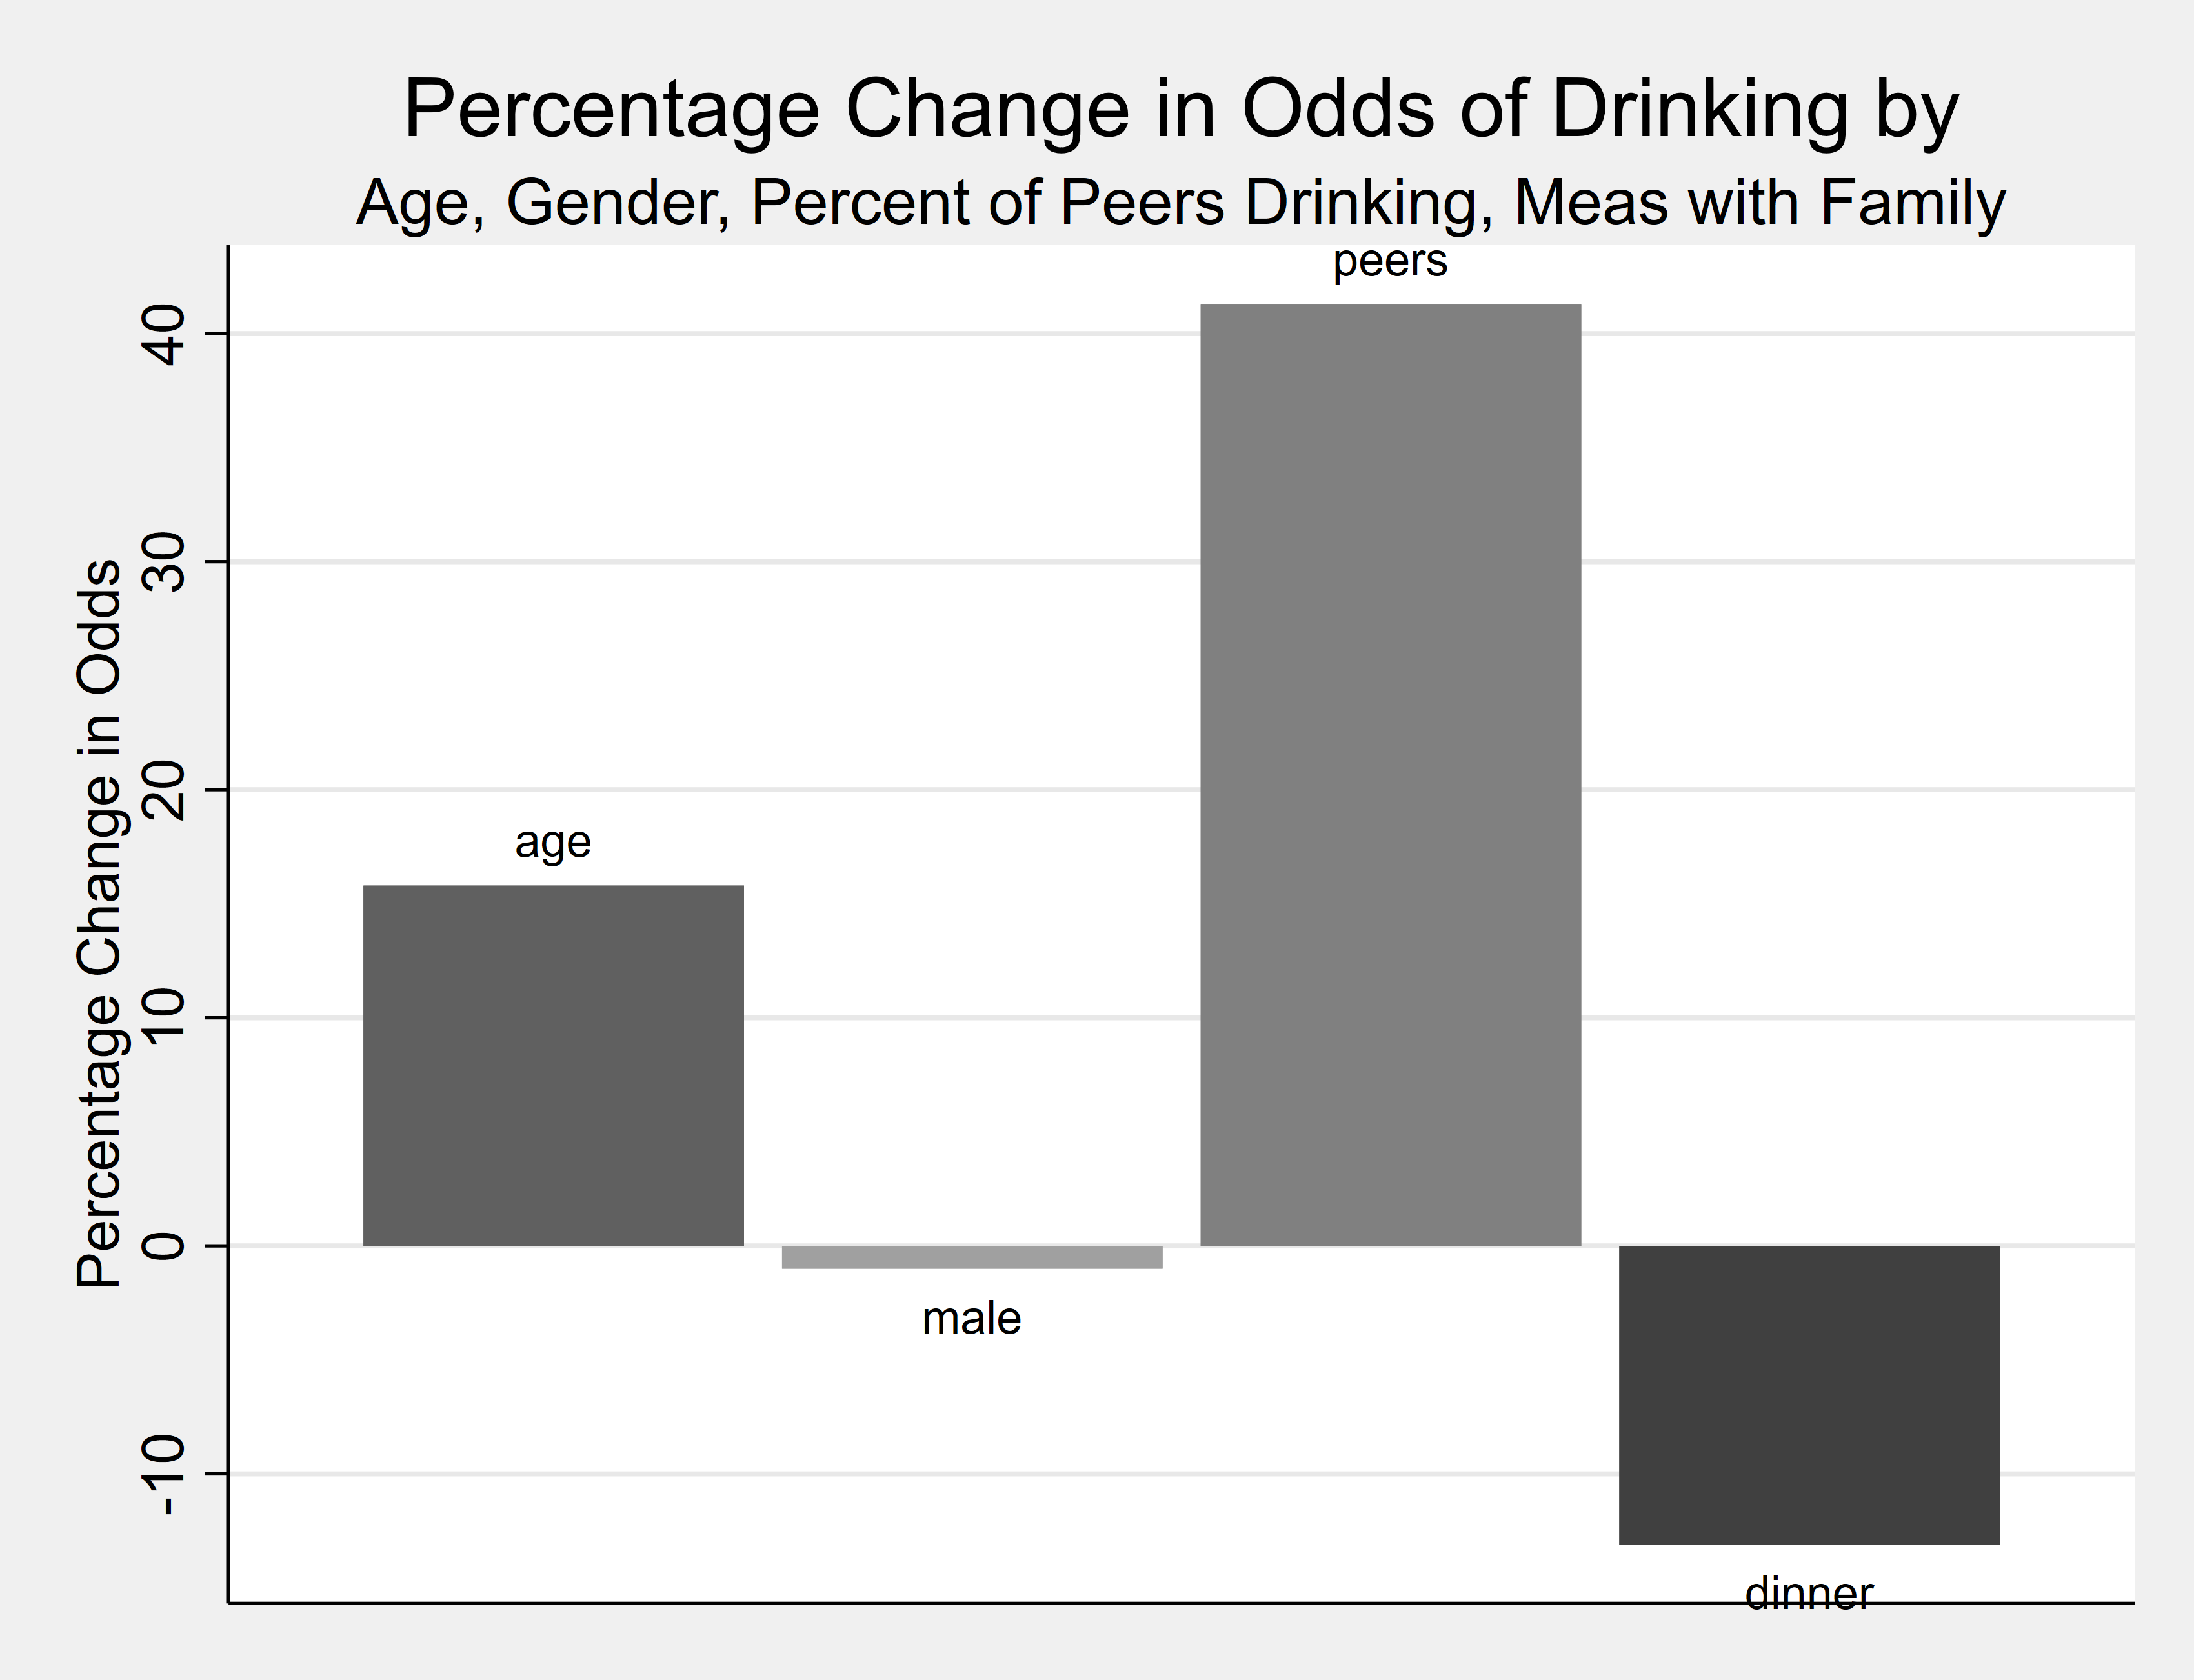

This tells us that likelihood of drinking increases with age and having peers who drink. Additionally, having dinner with family decreases likelihood of drinking.

# Running interactions within a logistic regression model

Now, let's say we want to exchange gender for race.

<b>Additive model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(Black_i)$

<b>Interaction model:</b>

<center>$(drink_i)=\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(Black_i)+\beta_6*(pdrink_iXBlack_i)$

In [21]:
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear
gen black=race97-1
replace black= . if race97>2

label define black 0 "White" 1 "Black"
label define drank30 0 "No" 1 "Yes"
label values drank30 drank30
label values black black


(National Survey of Youth, 1997, selected variables from first wave)

(80 missing values generated)

(1,284 real changes made, 1,284 to missing)






In [22]:
*running the estimate of the additive model
logistic drank30 age97 i.black pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(4)    =  68.99
                                                        Prob > chi2   = 0.0000
Log likelihood = -901.37311                             Pseudo R2     = 0.0369

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.148151    .072974     2.17   0.030     1.013675    1.300468
             |
       black |
      Black  |   .6835464   .0924246    -2.81   0.005     .5244139    .8909673
    pdrink97 |   1.326099   .0639618     5.85   0.000      1.20648    1.457579
    dinner97 |   .9333043   .0229783    -2.80   0.005      .889337    .9794453
       _cons |   .0749969   .0645679    -3.01   0.003     .0138742    .4053945
--------------------

In [23]:
*running the interaction model
logistic drank30 age97 i.black##c.pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(5)    =  74.90
                                                        Prob > chi2   = 0.0000
Log likelihood = -898.41872                             Pseudo R2     = 0.0400

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.133852   .0723388     1.97   0.049     1.000577    1.284879
             |
       black |
      Black  |   1.204066   .3203253     0.70   0.485     .7148248    2.028154
    pdrink97 |    1.42815   .0822901     6.18   0.000     1.275638    1.598895
             |
       black#|
  c.pdrink97 |
      Black  |    .779586     .07992    -2.43   0.015     .6376792    .9530721
             |
    dinner97 |   .9331713   .0230017   

In [24]:
margins black, at(pdrink=(1 2 3 4 5)) atmeans


Adjusted predictions                                     Number of obs = 1,413
Model VCE: OIM

Expression: Pr(drank30), predict()
1._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        1
       dinner97 = 4.760793 (mean)
2._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        2
       dinner97 = 4.760793 (mean)
3._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        3
       dinner97 = 4.760793 (mean)
4._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        4
       dinner97 = 4.760793 (mean)
5._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        5
       dinner97 = 4.760793 (mean)

-----------------------------------------------------

In [25]:
marginsplot
graph export "race_drink.png", replace width(3400)



Variables that uniquely identify margins: pdrink97 black

file C:/Users/acade/.stata_kernel_cache/graph3.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph3.pdf saved as PDF format

(file race_drink.png not found)
file race_drink.png saved as PNG format


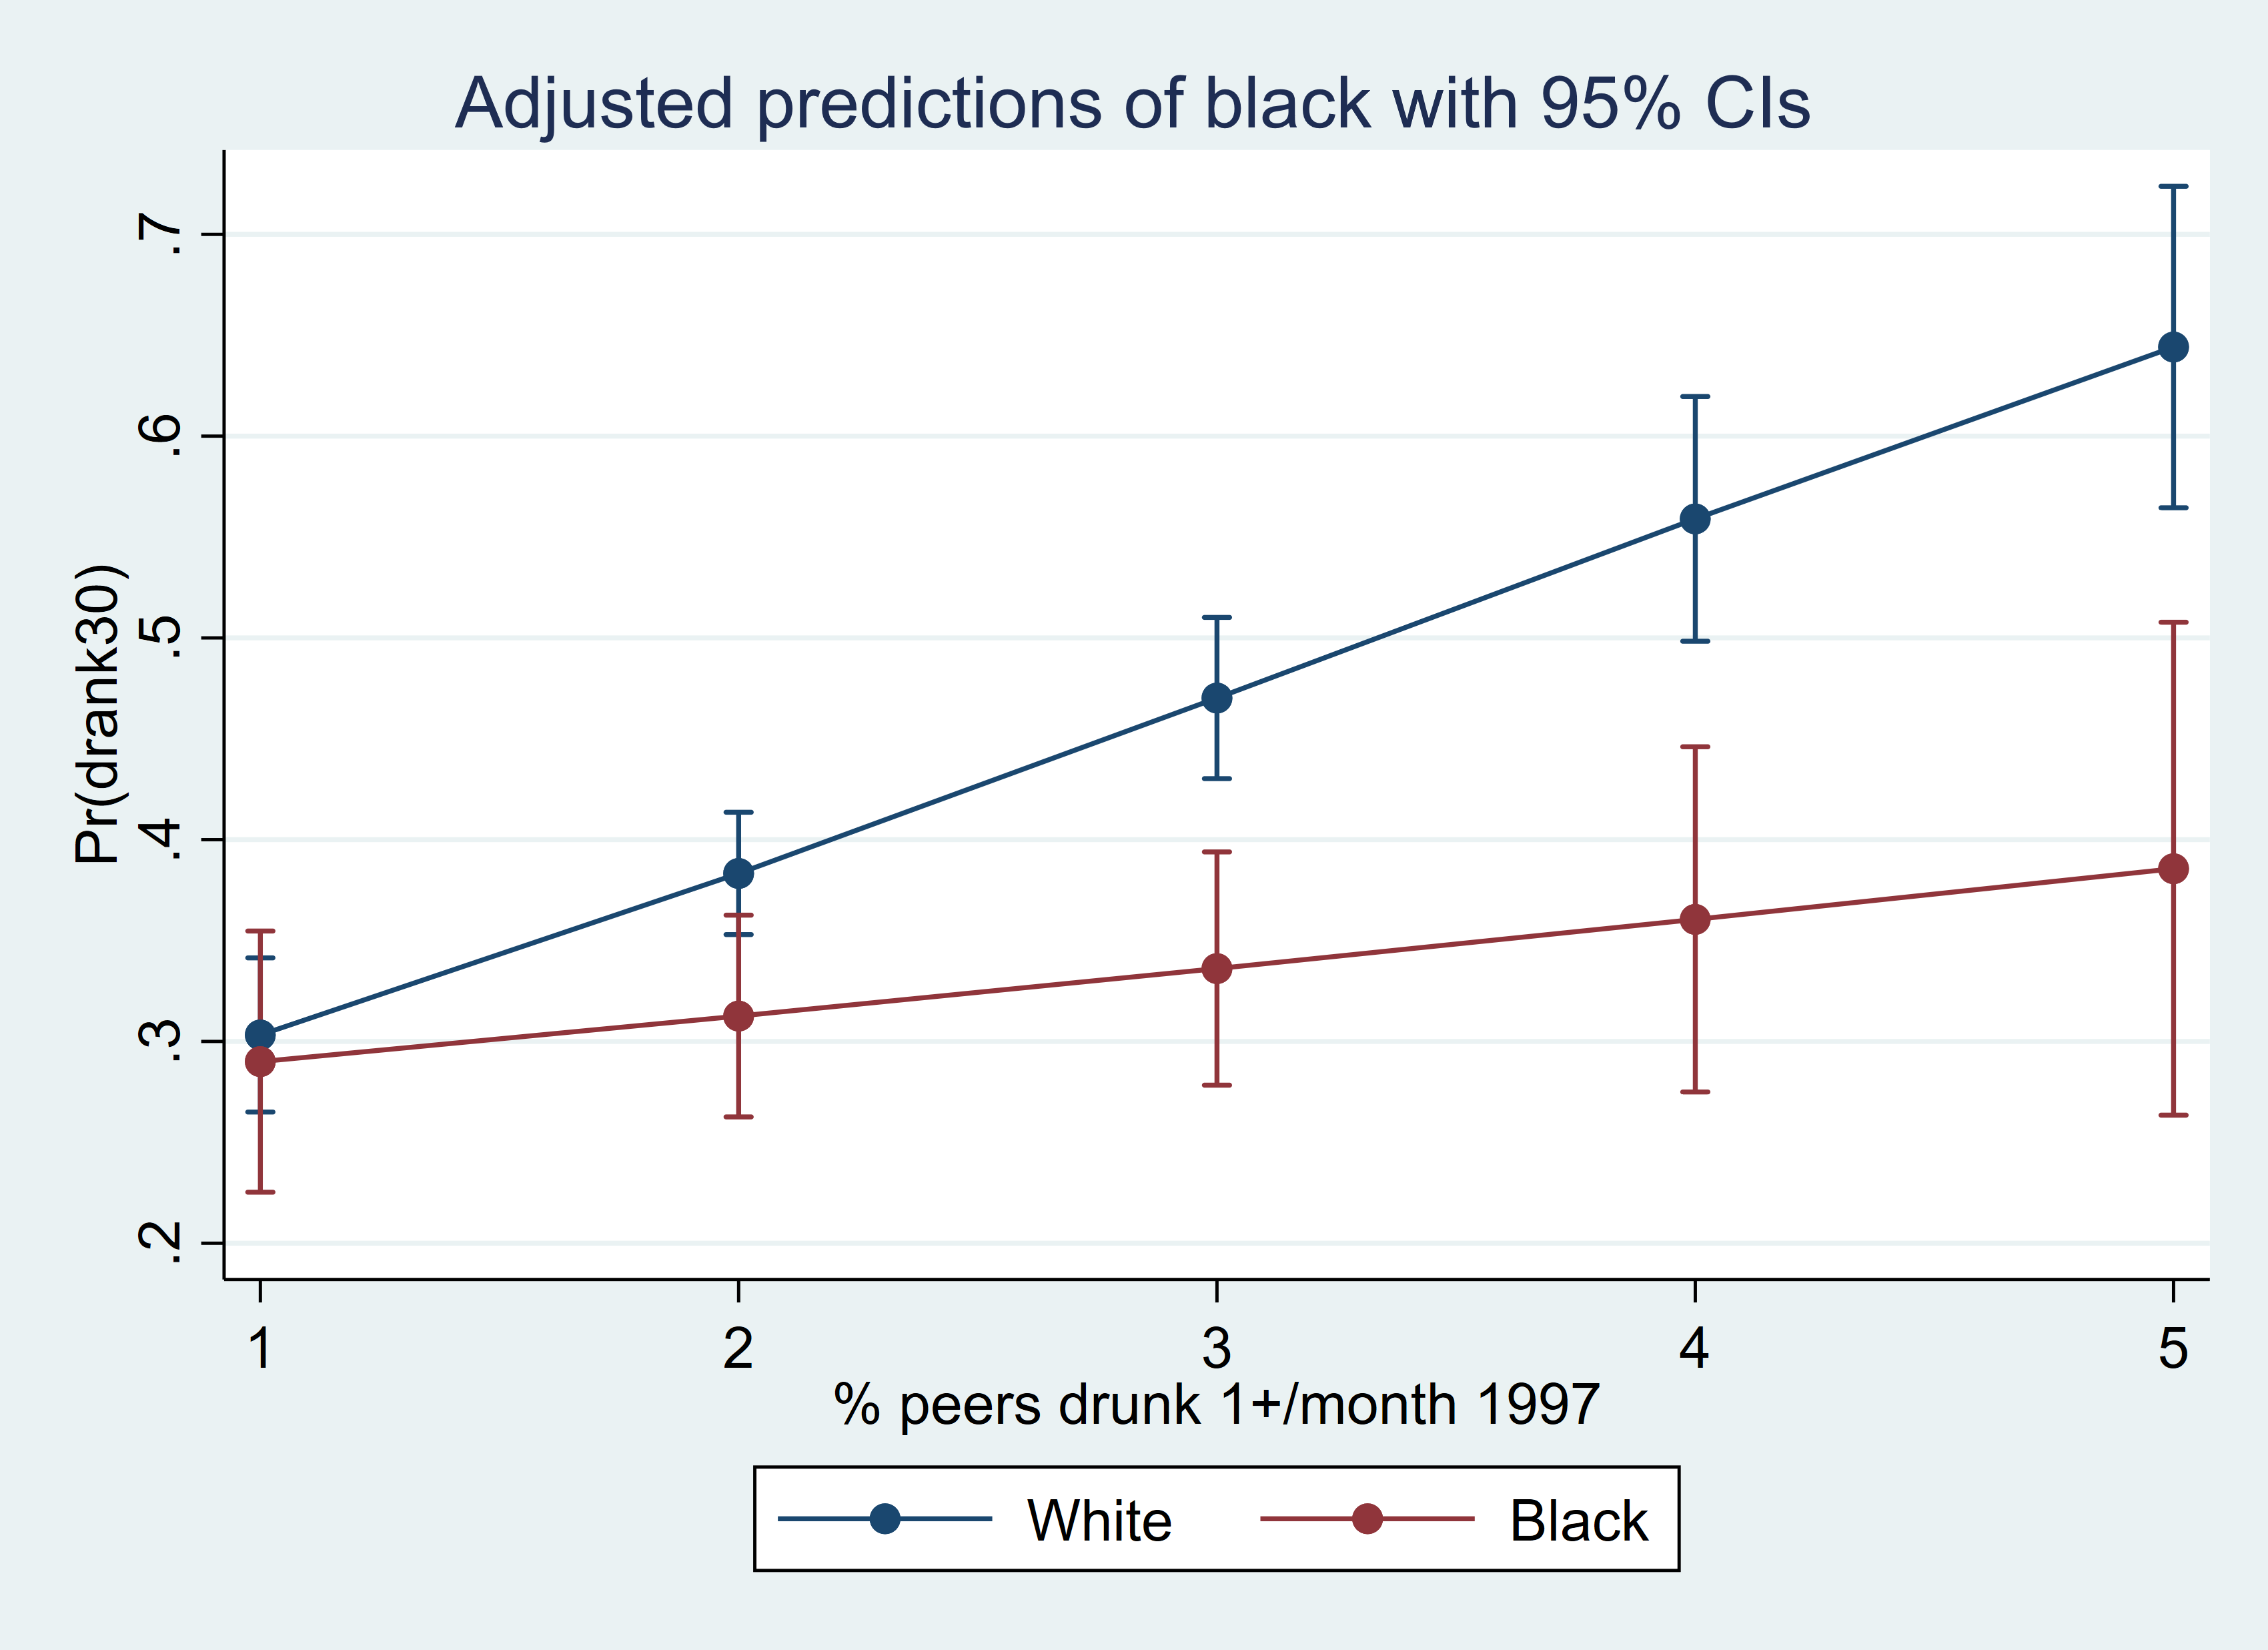

We see the odds for drinking in the last 30 days increases a greater rate for white people as number of peers who drink increases. The interaction term is also statistically significant.

# Panel analysis: examining units over time

All the data and analyses we have done so far have been <i>cross-sectional.</i> Meaning they focus on a single-time period. If your data is panel meaning has data of observations over time, then you have to use panel analysis to estimate the model because observations over time are more likely to be dependent on each other.

Panel analysis examines observations over time. For example, you can examine country's CO2 emissions over time or individual's BMI indexes over time. One of the advantages of panel analysis, is that it is a stronger causal argument. Within sociological panel analysese the following two models are most frequently used:
* Random effects model
* Between effects model
* Fixed effects model

### Random effects model
The random effects model (also sometimes referred to as a random intercept model) for panel data where there are i clusters with t time points. The random effects model controls for time-dependence (t) by giving every i cluster it's own intercept. The random effects model examines all i and t observations in the panel data while controling for i clusters.

So for example, we can derive the random effects model by doing the following. First we have the panel represented as a traditional regression model:

<center>$y_{ti}=\beta_1+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\xi_{pti}$
    
where $y_{ti}$ is the outcome at t time and i panel-observation

$\beta_1$ is intercept

$\beta_2 ... \beta_p$ is the coefficient for $x_{2ti} ... x_{pti}$
    
$x_{2ti} ... x_{pti}$ are the covariates/independent variables
    
$\xi_{pti}$ is the residual error term (this greek letter is pronouced like "sky" but with a z)

<b>But we need to do some sort of controlling here for the i clusters

Given that t times are clustered with i, we can substitute: $\xi_{ti}=\zeta_i + \epsilon_{ti}$

where $\zeta_i$ is difference between the overall population mean and i-cluster specific mean 

$\epsilon_{ti}$ is the residual error term for all observations

Now, substituting to the previous equation does...

<center>$y_{ti}=\beta_1+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+(\zeta_i + \epsilon_{ti})$

<center>$y_{ti}=(\beta_1+\zeta_i)+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+ \epsilon_{ti}$
    
where $(\beta_1+\zeta_t)$ is the i cluster-specific intercept

### Between effects model
The between effects model is a random-intercept model of the average of the dependent and independent variables of the model. The between-effects model observes only the between-j effects of the independent variables.

<center>$y_{.i}=\beta_1+\beta_2*\bar{x}_{2.i}+...+\beta_p*\bar{x}_{p.i}+\zeta_i + \bar{\epsilon}_{.i}$
    
where $y_{.i}$ is the mean outcome of i cluster

$\bar{x}_{2.i} ... \bar{x}_{p.i}$ is the average of the independent variables or covariates for i-cluster

$\zeta_i + \bar{\epsilon}_{.i}$ has the population mean $E(\zeta_t+\bar{\epsilon}_{.i})=0$ and has heteroskedastic variance $Var(\zeta_t+\bar{\epsilon}_{.i}=\psi+\theta/n_j$
    
<b>The between effects model doesn't have ANY within effects in the model. Any non-temporal variables are part of the intercept.

### Fixed effects model
The fixed effects model (sometimes referred to as "within-effects" model) examines only the effects within each i cluster. You derive the fixed effects model by taking the random effects model and subtracting the between effects model:

<center>$y_{ti}-y_{.i}=\beta_1+\beta_2*(x_{2ti}-\bar{x}_{2.i})+...+\beta_p*(x_{pti}-\bar{x}_{p.i})+\zeta_i+(\epsilon_{ti}-\bar{\epsilon}_{.i})$
    
Then, substitute the random intercept for i-specific clusters ($\beta_1+\zeta_i$) with a fixed intercept $\alpha_i$. We do this by using dummies for each i cluster:
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\sum \limits _{k=1} ^{i}d_{ki}\alpha_k+\epsilon_{ti}$
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\alpha_i+\epsilon_{ti}$
    
<b>The fixed effects model centers all independent variables around its own i-cluster mean. $\epsilon_{ti}-\bar{\epsilon}_{.i}$ has the population mean $E(\epsilon_{ti}-\bar{\epsilon}_{.i})=0$ and is heteroskedastic with variance $Var(\epsilon_{ti}-\bar{\epsilon}_{.i})=\theta(1-1/n_j)$.
    
Non-temporal covariates are dropped from the model. 

## Let's practice running these various models in Stata

### Reshaping the data
Before estimating panel results, data must be in long format. The data we are working with right now, is currently in wide format, meaning there are multiple variables representing the each time period for the variables.

In [26]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5"
*load the data
use "https://www.stata-press.com/data/mlmus4/pefr.dta", clear
desc
*This is how wide data looks like
list if id<6


C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 5



Contains data from https://www.stata-press.com/data/mlmus4/pefr.dta
 Observations:            17                  
    Variables:             5                  26 Nov 2004 15:45
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
wp1             float   %9.0g                 
wp2             float   %9.0g                 
wm1             float   %9.0g                 
wm2             float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 


     +----------------------------+
     | id   wp1   wp2   wm1   wm2 |
     |----------------------------|
  1. |  1   494   490   512   525 |
  2. |  2   395   

In [27]:
*You can reshape the data in Stata
reshape long wp wm, i(id) j(time)

(j = 1 2)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations               17   ->   34          
Number of variables                   5   ->   4           
j variable (2 values)                     ->   time
xij variables:
                                wp1 wp2   ->   wp
                                wm1 wm2   ->   wm
-----------------------------------------------------------------------------


In [28]:
list if id<6


     +-----------------------+
     | id   time    wp    wm |
     |-----------------------|
  1. |  1      1   494   512 |
  2. |  1      2   490   525 |
  3. |  2      1   395   430 |
  4. |  2      2   397   415 |
  5. |  3      1   516   520 |
     |-----------------------|
  6. |  3      2   512   508 |
  7. |  4      1   434   428 |
  8. |  4      2   401   444 |
  9. |  5      1   476   500 |
 10. |  5      2   470   500 |
     +-----------------------+


Notice the the difference. Data must be in long format in order to run panel analysis.

The previous example was just for us to practice reshaping data. 

Now, we will open data that is already in long format. This is a dataset is mothers giving birth beween 1990 to 1998. This is subset from Abrevaya 2006 data published in the Journal of Applied Econometrics Data Archive. Here are main variables:

* momid: mother identifier
* birwt: birthweight (in grams)
* smoke: dummy variable for mother smoking during pregnancy
* male: dummy variable for sex of baby
* mage: mother's age at birth (in yrs)
* hsgrad: dummy variable of mom's grad HS
* somecoll: dummy variable of mom's having some college or more
* collgrad: dummy variable of mom's graduate college
* (omitted): reference catgory where mom's did not graduate HS
* married: dummy variable of married
* black: dummy variable for racial identity Black person
* kessner2: Kessner index=2 is of adequate prenatal care
* kessner3: Kessner index=3 is of adequate prenatal care
* omitted: Kessner index=1 is of adequate prenatal care (ref category)
* novisit: dummy variable no prenatal care visit
* pretri2: dummy variable fo first prenatal care visit in 2nd trimester
* pretri3: dummy variable fo first prenatal care visit in 3rd trimester
* omitted: ref cat of first prenatal care visit in 1st trimester

In [29]:
*Let's run the data 
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
desc




Contains data from https://www.stata-press.com/data/mlmus4/smoking.dta
 Observations:         8,604                  
    Variables:            24                  21 Jul 2007 11:49
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
momid           float   %9.0g                 
idx             float   %9.0g                 
stateres        float   %9.0g      state      
mage            float   %9.0g                 
meduc           float   %9.0g                 
mplbir          float   %9.0g      state      
nlbnl           float   %9.0g                 
gestat          float   %9.0g                 
birwt           float   %9.0g                 
cigs            float   %9.0g                 
smoke           float   %9.0g      s          
male            float   %9.0g     

In [30]:
list in 1/3


     +-------------------------------------------------------------------------+
  1. | momid | idx | stateres | mage | meduc | mplbir | nlbnl | gestat | birwt |
     |    14 |   1 |       AL |   16 |    10 |     VA |     0 |     24 |  2790 |
     |-------+-----------------------------------------------------------------|
     | cigs  |     smoke  |   male  | year  | married  |  hsgrad  |  somecoll  |
     |    0  | Nonsmoker  | Female  |    0  |       0  |       0  |         0  |
     |-------------------------------------------------------------------------|
     | collgrad | magesq | black | kessner2  | kessner3  | novisit  | pretri2  |
     |        0 |    256 | Black |        0  |        1  |       0  |       0  |
     |-------------------------------------------------------------------------|
     |                                 pretri3                                 |
     |                                       1                                 |
     +---------------------

### XTSET: you must tell Stata, the data is panel using the xtset command.

In [31]:
*use the i cluster
xtset momid


Panel variable: momid (unbalanced)


<i>Balanced panel data means no data is missing among the years. Unbalanced data means there are some missing years.

In [32]:
*Stata has many specific panel commands "xt"
*xtsum reports summary statistics overall, between, and within the data.
xtsum birwt smoke black year


Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
birwt    overall |  3469.931   527.1394        284       5642 |     N =    8604
         between |             451.1943       1361     5183.5 |     n =    3978
         within  |             276.7966   1528.431   5411.431 | T-bar =  2.1629
                 |                                            |
smoke    overall |  .1399349   .3469397          0          1 |     N =    8604
         between |             .3216459          0          1 |     n =    3978
         within  |             .1368006  -.5267318   .8066016 | T-bar =  2.1629
                 |                                            |
black    overall |  .0717108   .2580235          0          1 |     N =    8604
         between |              .257512          0          1 |     n =    3978
         within  |                    0   .0717108   .0717108 | T-bar =

Here, there are 3978 mothers observed over 8 years. Since the data is unbalanced that means that some mothers have missing years.

## Estimating models
Once the data is in long format and the data has been declared a panel data in Stata, we can now estimate models.

### Random effects model
In Stata, you can use the xtreg command to estimate random effects model.

In [33]:
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg birwt smoke male mage hsgrad somecoll collgrad ///
    married black kessner2 kessner3 novisit pretri2 pretri3, mle vce(robust)


Fitting constant-only model:
Iteration 0:   log likelihood = -65475.527
Iteration 1:   log likelihood = -65475.486

Fitting full model:
Iteration 0:   log likelihood = -65149.757
Iteration 1:   log likelihood = -65145.754
Iteration 2:   log likelihood = -65145.752

Random-effects ML regression                         Number of obs    =  8,604
Group variable: momid                                Number of groups =  3,978

Random effects u_i ~ Gaussian                        Obs per group:
                                                                  min =      2
                                                                  avg =    2.2
                                                                  max =      3

                                                     Wald chi2(13)    = 625.35
Log likelihood = -65145.752                          Prob > chi2      = 0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------

In [34]:
gen education=hsgrad*1+somecoll*2+collgrad*3
label define ed 0 "No HS Degree" 1 "HS Degree" 2 "Some Coll" 3 "College"
label values education ed

In [35]:
xtreg birwt i.smoke male mage i.education married black ///
    kessner2 kessner3 novisit pretri2 pretri3, mle vce(robust)


Fitting constant-only model:
Iteration 0:   log likelihood = -65475.527
Iteration 1:   log likelihood = -65475.486

Fitting full model:
Iteration 0:   log likelihood = -65149.757
Iteration 1:   log likelihood = -65145.754
Iteration 2:   log likelihood = -65145.752

Random-effects ML regression                         Number of obs    =  8,604
Group variable: momid                                Number of groups =  3,978

Random effects u_i ~ Gaussian                        Obs per group:
                                                                  min =      2
                                                                  avg =    2.2
                                                                  max =      3

                                                     Wald chi2(13)    = 625.35
Log likelihood = -65145.752                          Prob > chi2      = 0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------

In [37]:
margins i.smoke#i.education


Predictive margins                                       Number of obs = 8,604
Model VCE: Robust

Expression: Linear prediction, predict()

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   std. err.      z    P>|z|     [95% conf. interval]
--------------+----------------------------------------------------------------
        smoke#|
    education |
   Nonsmoker #|
No HS Degree  |   3430.916   24.67086   139.07   0.000     3382.562     3479.27
   Nonsmoker #|
   HS Degree  |   3487.763    13.8228   252.32   0.000     3460.671    3514.855
   Nonsmoker #|
   Some Coll  |   3511.602   13.77164   254.99   0.000      3484.61    3538.594
   Nonsmoker #|
     College  |   3521.749   12.00223   293.42   0.000     3498.225    3545.273
      Smoker #|
No HS Degree  |   3212.587   26.54921   121.01   0.000     3160.552    3264.623
      Smoker #|
   HS Degree  |   3269.434   20.48585   159.59   0.

In [38]:
marginsplot, xdimension(education)
graph export "intersmokeedu.png", replace width(3400)



Variables that uniquely identify margins: smoke education

file C:/Users/acade/.stata_kernel_cache/graph4.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph4.pdf saved as PDF format

file intersmokeedu.png saved as PNG format


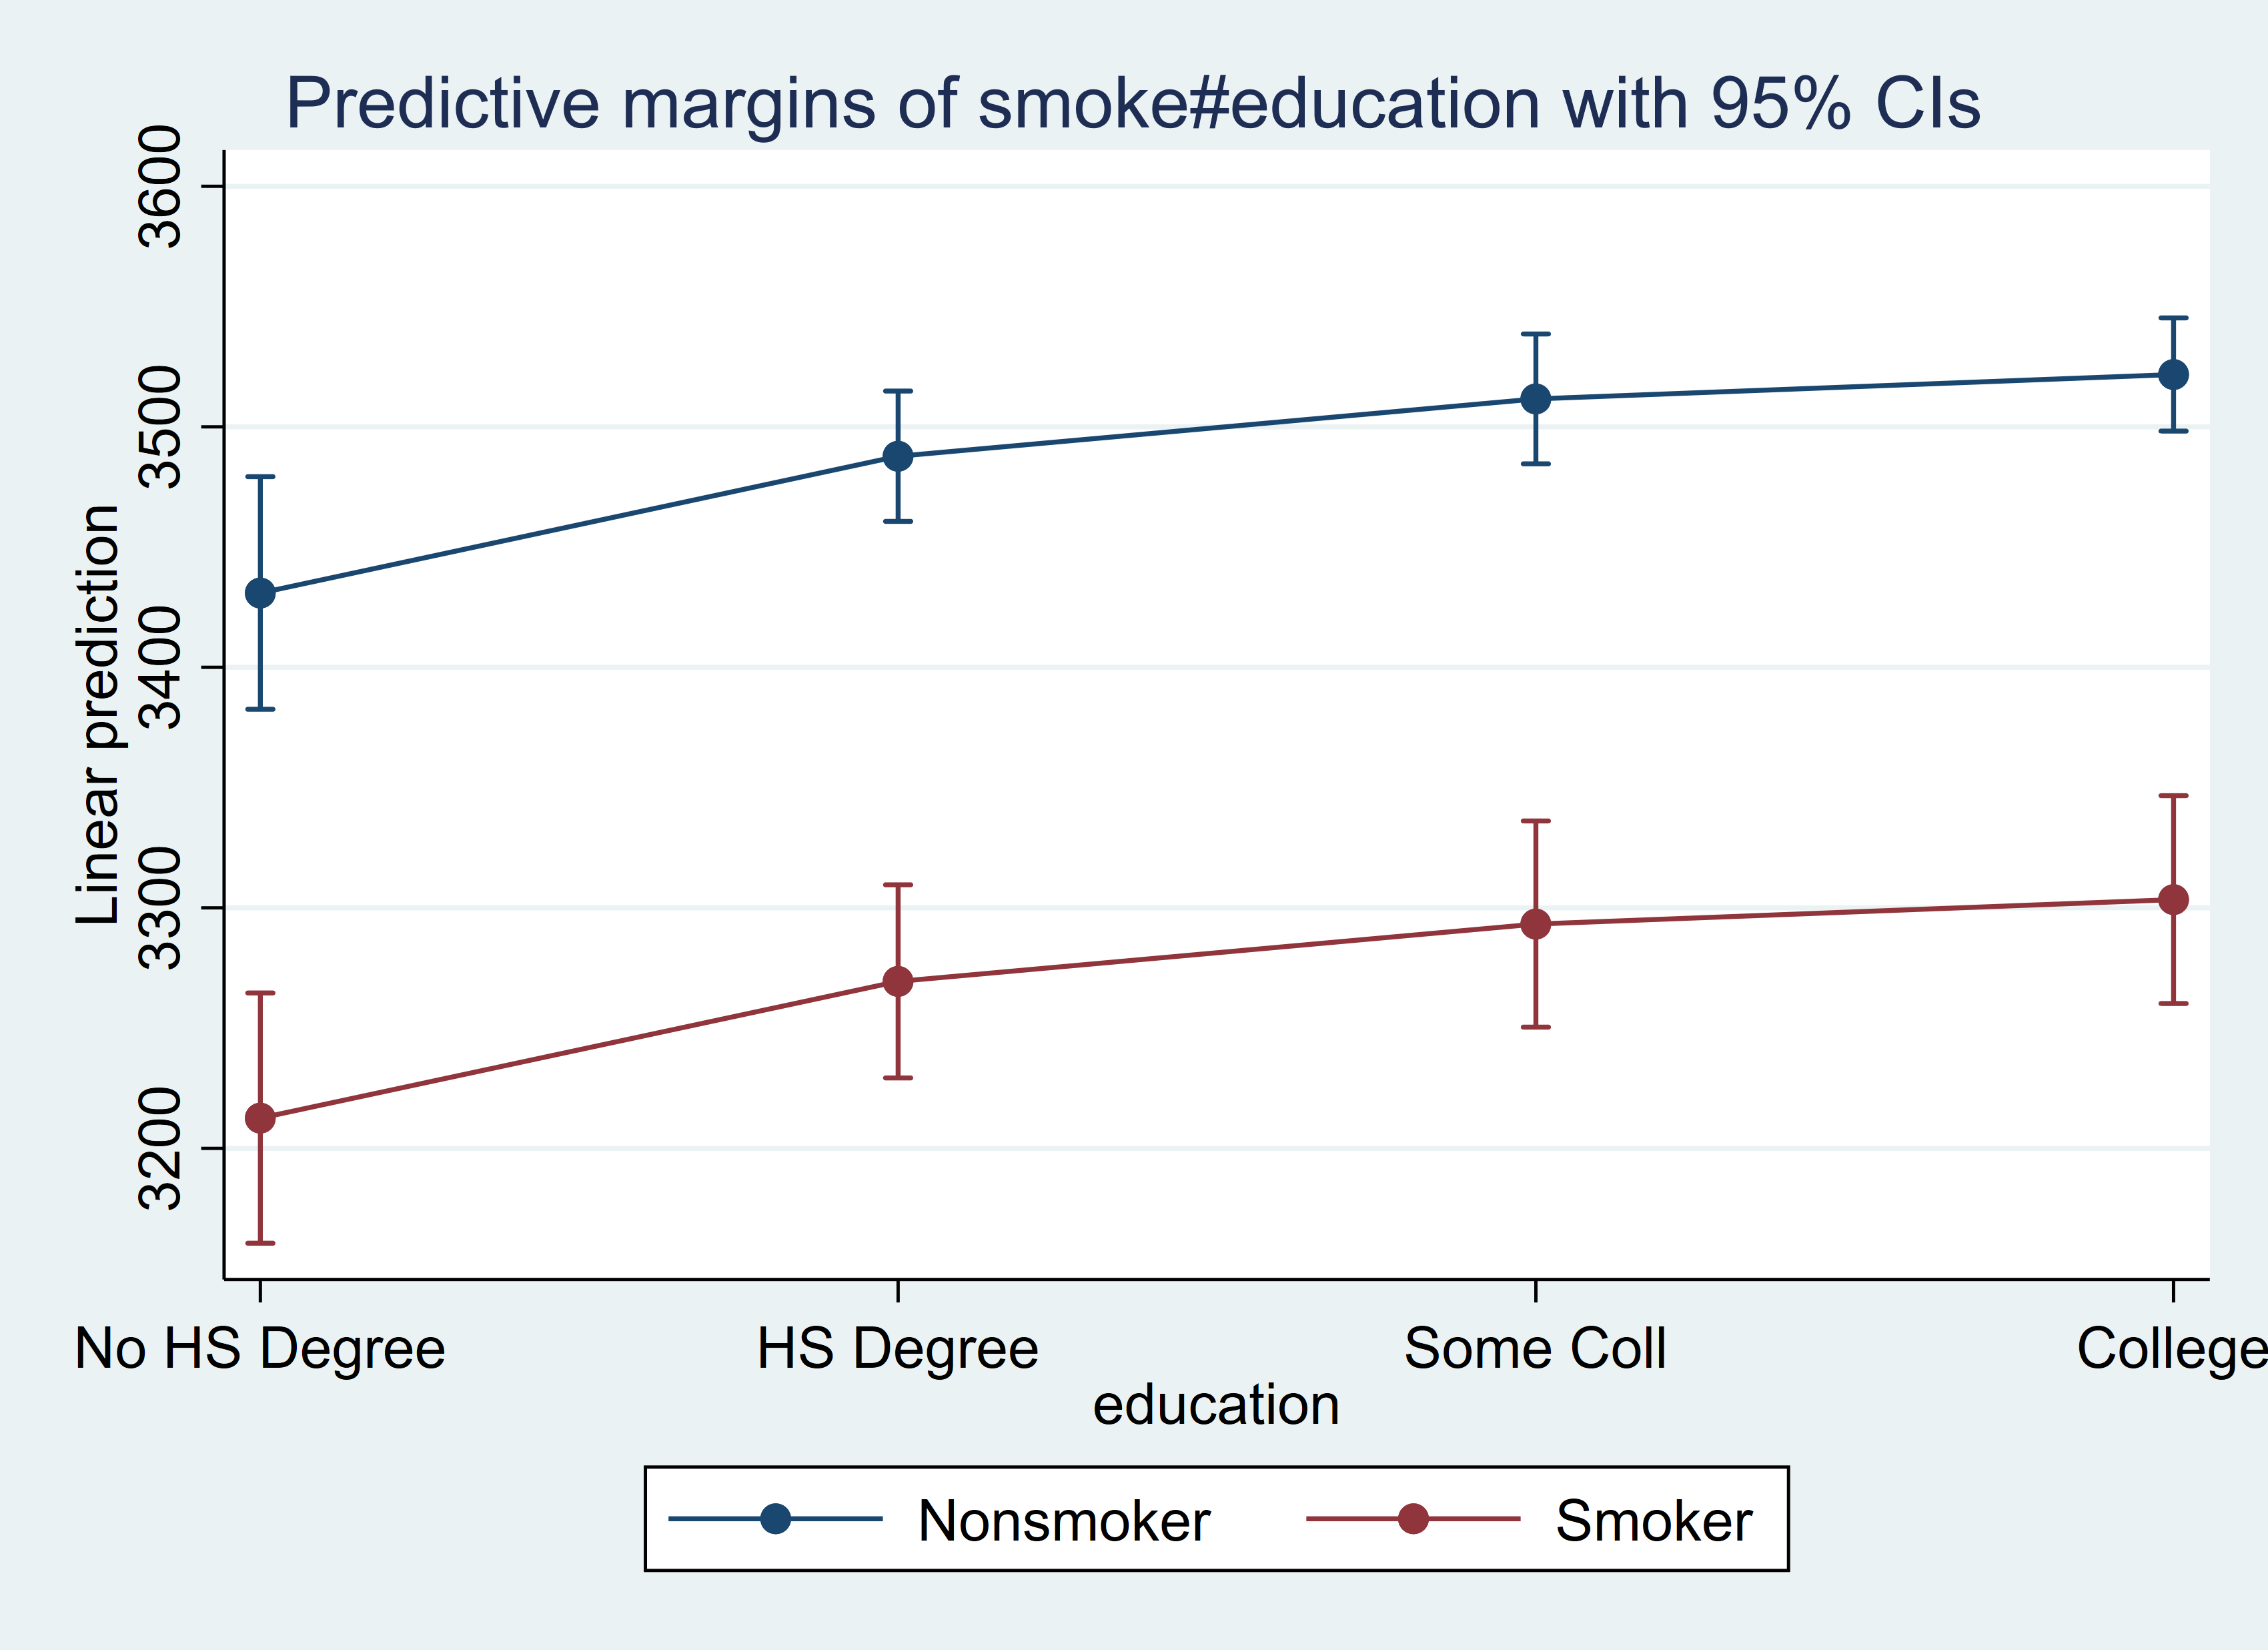

### Between effects model
In Stata, you can use the xtreg command with "be" to estimate between effects model.

In [39]:
xtreg birwt i.smoke male mage i.education married black ///
    kessner2 kessner3 novisit pretri2 pretri3, be


Between regression (regression on group means)  Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0299                                         min =          2
     Between = 0.1168                                         avg =        2.2
     Overall = 0.0949                                         max =          3

                                                F(13,3964)        =      40.31
sd(u_i + avg(e_i.)) = 424.7306                  Prob > F          =     0.0000

------------------------------------------------------------------------------
       birwt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  |  -286.1476   23.22554   -12.32   0.000    -331.6828   -240.6125
        male |   104.9432   19.49531     5.38   0

### Fixed effects model
In Stata, you can use the xtreg command with "fe" to estimate fixed effects model.

In [40]:
xtreg birwt i.smoke male mage ///
    kessner2 kessner3 novisit pretri2 pretri3, fe vce(robust)


Fixed-effects (within) regression               Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0465                                         min =          2
     Between = 0.0557                                         avg =        2.2
     Overall = 0.0546                                         max =          3

                                                F(8,3977)         =      26.78
corr(u_i, Xb) = -0.0733                         Prob > F          =     0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------------------------------------------------------
             |               Robust
       birwt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  

<b> Note, you cannot general fixed effects to the general population, it is cluster specific. 

## Panel analysis and Logistic regression
In the occasion that we have a dichotomous variable, need to adapt our model to using logit and reporting odds ratios. Here is a random-intercept logistic regression model:

<center>$logit{Pr(y_{ti}=1|x_{ti},\zeta_i)}=\beta_1+\beta_2*x_{2i}+...+\beta_p*x_{pti}+\zeta_i$
    
<center>$\pi_{ti}=Pr(y_{ti}|x_{ti},\zeta_i)$ where

<center>$logit(\pi_{ti})=\beta_1+\beta_2*x_{2t}+\beta_2*x_{3ti}+...+\beta_p*x_{pti}+\zeta_i$
    
<center>$y_{ti}|\pi_{ti} ~ Binomial(1,\pi_{ti})$

In [25]:
use https://www.stata-press.com/data/r17/union
desc


(NLS Women 14-24 in 1968)


Contains data from https://www.stata-press.com/data/r17/union.dta
 Observations:        26,200                  NLS Women 14-24 in 1968
    Variables:             8                  4 May 2020 13:54
                                              (_dta has notes)
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
idcode          int     %8.0g                 NLS ID
year            byte    %8.0g                 Interview year
age             byte    %8.0g                 Age in current year
grade           byte    %8.0g                 Current grade completed
not_smsa        byte    %8.0g                 1 if not SMSA
south           byte    %8.0g                 1 if south
union           byte    %8.0g                 1 if union
black           byte 

In [26]:
list in 1/3


     +----------------------------------------------------------------+
     | idcode   year   age   grade   not_smsa   south   union   black |
     |----------------------------------------------------------------|
  1. |      1     72    20      12          0       0       1       1 |
  2. |      1     77    25      12          0       0       0       1 |
  3. |      1     80    28      12          0       0       1       1 |
     +----------------------------------------------------------------+


In [27]:
xtset idcode


Panel variable: idcode (unbalanced)


## Random effects model (logistic regression)

In [32]:
*intpoints is used to ensure accuracy for xtlogit models
xtlogit union age grade not_smsa south##c.year, intpoints(30) or


Fitting comparison model:

Iteration 0:   log likelihood =  -13864.23  
Iteration 1:   log likelihood = -13547.326  
Iteration 2:   log likelihood = -13542.493  
Iteration 3:   log likelihood =  -13542.49  
Iteration 4:   log likelihood =  -13542.49  

Fitting full model:

tau =  0.0     log likelihood =  -13542.49
tau =  0.1     log likelihood = -12923.751
tau =  0.2     log likelihood = -12417.651
tau =  0.3     log likelihood = -12001.666
tau =  0.4     log likelihood = -11655.594
tau =  0.5     log likelihood = -11366.435
tau =  0.6     log likelihood = -11128.681
tau =  0.7     log likelihood = -10946.497
tau =  0.8     log likelihood =  -10844.83

Iteration 0:   log likelihood = -10946.505  
Iteration 1:   log likelihood = -10558.911  
Iteration 2:   log likelihood =  -10541.21  
Iteration 3:   log likelihood = -10541.037  
Iteration 4:   log likelihood = -10541.036  

Random-effects logistic regression                   Number of obs    = 26,200
Group variable: idcode          

## Fixed effects model logistic regression)
Now, remember how we derive fixed effects model earlier? If an an i cluster has the same categorical outcome across t time, in the fixed effects model logistic regression they are dropped out. Stata will automatically do.

In [29]:
xtlogit union age grade not_smsa south##c.year, fe

note: multiple positive outcomes within groups encountered.
note: 2,744 groups (14,165 obs) omitted because of all positive or
      all negative outcomes.

Iteration 0:   log likelihood = -4516.5881  
Iteration 1:   log likelihood = -4510.8906  
Iteration 2:   log likelihood =  -4510.888  
Iteration 3:   log likelihood =  -4510.888  

Conditional fixed-effects logistic regression        Number of obs    = 12,035
Group variable: idcode                               Number of groups =  1,690

                                                     Obs per group:
                                                                  min =      2
                                                                  avg =    7.1
                                                                  max =     12

                                                     LR chi2(6)       =  78.60
Log likelihood = -4510.888                           Prob > chi2      = 0.0000

--------------------------------------